# More on Missing Data - Lab

## Introduction

In this lab, you'll continue to practice techniques for dealing with missing data. Moreover, you'll observe the impact on distributions of your data produced by various techniques for dealing with missing data.

## Objectives

In this lab you will: 

- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset   
- Determine how the distribution of data is affected by imputing values 

## Load the data

To start, load the dataset `'titanic.csv'` using pandas.

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
df = pd.read_csv('titanic.csv')


Use the `.info()` method to quickly preview which features have missing data

In [2]:
# Your code here
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1391 non-null   float64
 1   Survived     1391 non-null   float64
 2   Pclass       1391 non-null   object 
 3   Name         1391 non-null   object 
 4   Sex          1391 non-null   object 
 5   Age          1209 non-null   float64
 6   SibSp        1391 non-null   float64
 7   Parch        1391 non-null   float64
 8   Ticket       1391 non-null   object 
 9   Fare         1391 non-null   float64
 10  Cabin        602 non-null    object 
 11  Embarked     1289 non-null   object 
dtypes: float64(6), object(6)
memory usage: 130.5+ KB


## Observe previous measures of centrality

Let's look at the `'Age'` feature. Calculate the mean, median, and standard deviation of this feature. Then plot a histogram of the distribution.

In [3]:
# Your code here
df['Age'].describe()  # Check the summary statistics of the 'Age' column

count    1209.000000
mean       29.731894
std        16.070125
min         0.420000
25%        20.000000
50%        27.000000
75%        40.000000
max        80.000000
Name: Age, dtype: float64

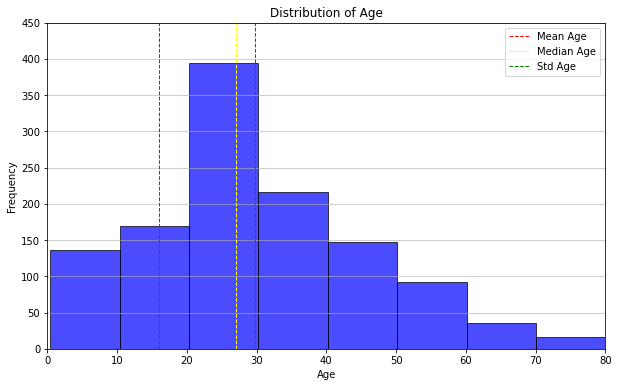

In [10]:
#Plot the distribution of the 'Age' column

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['Age'], bins=8, color='blue',edgecolor='black', alpha=0.7)
ax.set_title('Distribution of Age')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

plt.grid(axis='y', alpha=0.75)
ax.set_xticks(np.arange(0, 81, 10))
plt.xlim(0, 80)
ax.set_yticks(np.arange(0, 500, 50))

ax.axvline(df['Age'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Age')
ax.axvline(df['Age'].median(), color='yellow', linestyle='dashed', linewidth=1, label='Median Age')
ax.axvline(df['Age'].std(), color='green', linestyle='dashed', linewidth=1, label='Std Age')
ax.legend(loc='upper right')

plt.show();

## Impute missing values using the mean 

Fill the missing `'Age'` values using the average age. (Don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

In [6]:
# Your code here
# Create a copy of the original DataFrame
df_copy = df.copy()

# Fill missing values in the 'Age' column with the mean age
df_copy['Age'] = df_copy['Age'].fillna(df['Age'].mean())

#Recalculate the mean, median, and standard deviation of the 'Age' column after filling missing values
mean_age = df_copy['Age'].mean()
median_age = df_copy['Age'].median()
std_age = df_copy['Age'].std()

# Print the recalculated statistics
print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Standard Deviation of Age: {std_age}")


Mean Age: 29.731894127377974
Median Age: 29.731894127377988
Standard Deviation of Age: 14.981155476045366


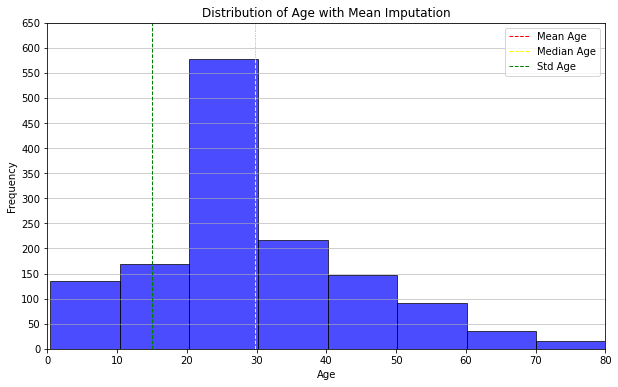

In [14]:
#Plot the distribution of the 'Age' column

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_copy['Age'], bins=8, color='blue',edgecolor='black', alpha=0.7)
ax.set_title('Distribution of Age with Mean Imputation')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

plt.grid(axis='y', alpha=0.75)
ax.set_xticks(np.arange(0, 81, 10))
plt.xlim(0, 80)
ax.set_yticks(np.arange(0, 700, 50))

ax.axvline(df_copy['Age'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Age')
ax.axvline(df_copy['Age'].median(), color='yellow', linestyle='dashed', linewidth=1, label='Median Age')
ax.axvline(df_copy['Age'].std(), color='green', linestyle='dashed', linewidth=1, label='Std Age')
ax.legend(loc='upper right')

plt.show();

### Commentary

Note that the standard deviation dropped, the median was slightly raised and the distribution has a larger mass near the center.

## Impute missing values using the median 

Fill the missing `'Age'` values, this time using the median age. (Again, don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

Mean Age: 29.374450035945355
Median Age: 27.0
Standard Deviation of Age: 15.009475778073446


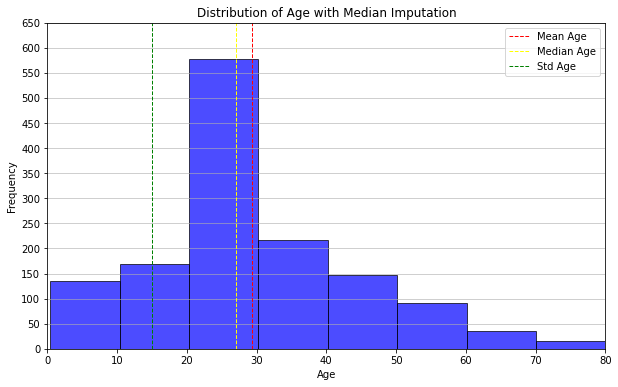

In [ ]:
# Your code here
df_copy= df.copy()

# Fill missing values in the 'Age' column with the median age
df_copy['Age'] = df_copy['Age'].fillna(df['Age'].median())

#Recalculate the mean, median, and standard deviation of the 'Age' column after filling missing values
mean_age = df_copy['Age'].mean()
median_age = df_copy['Age'].median()
std_age = df_copy['Age'].std()

# Print the recalculated statistics
print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Standard Deviation of Age: {std_age}")

#Plot the distribution of the 'Age' column 
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_copy['Age'], bins=8, color='blue',edgecolor='black', alpha=0.7)
ax.set_title('Distribution of Age with Median Imputation')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.grid(axis='y', alpha=0.75)
ax.set_xticks(np.arange(0, 81, 10))
plt.xlim(0, 80)
ax.set_yticks(np.arange(0, 700, 50))
ax.axvline(df_copy['Age'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Age')
ax.axvline(df_copy['Age'].median(), color='yellow', linestyle='dashed', linewidth=1, label='Median Age')
ax.axvline(df_copy['Age'].std(), color='green', linestyle='dashed', linewidth=1, label='Std Age')
ax.legend(loc='upper right')
plt.show();



### Commentary

Imputing the median has similar effectiveness to imputing the mean. The variance is reduced, while the mean is slightly lowered. You can once again see that there is a larger mass of data near the center of the distribution.

## Dropping rows

Finally, let's observe the impact on the distribution if we were to simply drop all of the rows that are missing an age value. Then, calculate the mean, median and standard deviation of the ages along with a histogram, as before.

Mean Age: 29.731894127377988
Median Age: 27.0
Standard Deviation of Age: 16.070124603444675


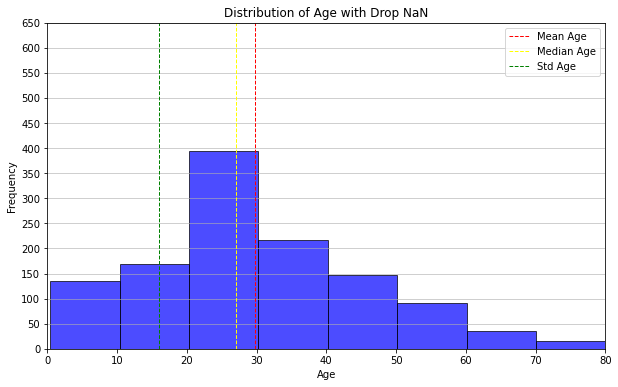

In [16]:
# Your code here
df_copy = df.copy()
#drop all rows with missing values in the 'Age' column
df_copy.dropna(subset=['Age'])
#Recalculate the mean, median, and standard deviation of the 'Age' column after dropping missing values
mean_age = df_copy['Age'].mean()
median_age = df_copy['Age'].median()
std_age = df_copy['Age'].std()

# Print the recalculated statistics
print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Standard Deviation of Age: {std_age}")

#Plot the distribution of the 'Age' column
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_copy['Age'], bins=8, color='blue',edgecolor='black', alpha=0.7)
ax.set_title('Distribution of Age with Drop NaN')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.grid(axis='y', alpha=0.75)
ax.set_xticks(np.arange(0, 81, 10))
plt.xlim(0, 80)
ax.set_yticks(np.arange(0, 700, 50))
ax.axvline(df_copy['Age'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Age')
ax.axvline(df_copy['Age'].median(), color='yellow', linestyle='dashed', linewidth=1, label='Median Age')
ax.axvline(df_copy['Age'].std(), color='green', linestyle='dashed', linewidth=1, label='Std Age')
ax.legend(loc='upper right')
plt.show();


### Commentary

Dropping missing values leaves the distribution and associated measures of centrality unchanged, but at the cost of throwing away data.

## Summary

In this lab, you briefly practiced some common techniques for dealing with missing data. Moreover, you observed the impact that these methods had on the distribution of the feature itself. When you begin to tune models on your data, these considerations will be an essential process of developing robust and accurate models.